# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_MicrosoftEdge_1.csv")
df.head()

,userName,score,at,content
0,Achmad Musaddad Alwi,1,2024-06-26 07:04:02,"ada bug, detail download tidak muncul, mohon d..."
1,Pundi utoyo,5,2024-06-25 22:21:45,Sangat bagus
2,wawan listanto,1,2024-06-25 17:14:28,Ukuran semakin besar menghabiskan memori
3,Minha Maula,2,2024-06-24 16:31:53,Audio sering error
4,Andy Marsa,5,2024-06-24 06:21:00,Aku sangat suka web edge lebih mudah dan cepat


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,"ada bug, detail download tidak muncul, mohon d...",Achmad Musaddad Alwi,2024-06-26 07:04:02
1,Sangat bagus,Pundi utoyo,2024-06-25 22:21:45
2,Ukuran semakin besar menghabiskan memori,wawan listanto,2024-06-25 17:14:28
3,Audio sering error,Minha Maula,2024-06-24 16:31:53
4,Aku sangat suka web edge lebih mudah dan cepat,Andy Marsa,2024-06-24 06:21:00
...,...,...,...
1995,aplikasi yang cukup bermanfaat dengan aplikasi...,Kyo Honoka,2021-08-28 02:09:47
1996,Ok,Abius Khomba,2021-08-27 23:42:00
1997,5 stars for you.,Muhammad Andy Hakim,2021-08-27 22:53:03
1998,Mantap,Beone RMCI jkt,2021-08-27 13:22:57


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   2000 non-null   object
 1   userName  2000 non-null   object
 2   at        2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content,userName,at
count,2000,2000,2000
unique,1586,1985,2000
top,Ok,Rahmat Hidayat,2024-06-26 07:04:02
freq,72,3,1


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2000, 3)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1586, 3)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,ada bug detail download tidak muncul mohon dip...,Achmad Musaddad Alwi,2024-06-26 07:04:02
1,sangat bagus,Pundi utoyo,2024-06-25 22:21:45
2,ukuran semakin besar menghabiskan memori,wawan listanto,2024-06-25 17:14:28
3,audio sering error,Minha Maula,2024-06-24 16:31:53
4,aku sangat suka web edge lebih mudah dan cepat,Andy Marsa,2024-06-24 06:21:00
...,...,...,...
1992,aplikasi smart,D N,2021-08-29 09:11:38
1993,kalau bisa ada fitur untuk mengganti warna wid...,G,2021-08-29 08:40:21
1994,easy to use,aghus hidayat,2021-08-28 17:36:45
1995,aplikasi yang cukup bermanfaat dengan aplikasi...,Kyo Honoka,2021-08-28 02:09:47


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile",
        "bguss" : "bagus",
        "yyuy" : "",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,ada bug detail download tidak muncul mohon dip...,Achmad Musaddad Alwi,2024-06-26 07:04:02
1,sangat bagus,Pundi utoyo,2024-06-25 22:21:45
2,ukuran semakin besar menghabiskan memori,wawan listanto,2024-06-25 17:14:28
3,audio sering error,Minha Maula,2024-06-24 16:31:53
4,aku sangat suka web edge lebih mudah dan cepat,Andy Marsa,2024-06-24 06:21:00
...,...,...,...
1992,aplikasi smart,D N,2021-08-29 09:11:38
1993,kalau bisa ada fitur untuk mengganti warna wid...,G,2021-08-29 08:40:21
1994,easy to use,aghus hidayat,2021-08-28 17:36:45
1995,aplikasi yang cukup bermanfaat dengan aplikasi...,Kyo Honoka,2021-08-28 02:09:47


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [18]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["aku", "anda", "bagaimana", "bahwa", "banyak", "beberapa", "bisa", "dan", "dari", "dengan", "dia", "di", "ini", "itu", "kamu", "kami", "kapan", "karena", "kita", "mereka", "pada", "saja", "sangat", "saya", "sebagaimana", "sebagai", "sebelum", "sudah", "tetapi", "tidak", "untuk", "yang",
                   "saya", "kamu", "dia", "mereka", "kita", "kami", "engkau", "anda", "kalian", "ini", "itu", "di", "ke", "dari", "pada", "dengan", "untuk", "kepada", "oleh", "sampai", "hingga", "sejak", "demi", "dan", "atau", "tetapi", "bahwa", "sehingga", "karena", "meskipun", "walaupun", "namun", "si",
                   "sang", "para", "bukan", "sudah", "belum", "masih", "akan", "telah", "sedang", "bisa", "dapat", "harus"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,bug detail download muncul mohon diperbaiki,Achmad Musaddad Alwi,2024-06-26 07:04:02
1,sangat bagus,Pundi utoyo,2024-06-25 22:21:45
2,ukuran semakin besar menghabiskan memori,wawan listanto,2024-06-25 17:14:28
3,audio sering error,Minha Maula,2024-06-24 16:31:53
4,aku sangat suka web edge lebih mudah cepat,Andy Marsa,2024-06-24 06:21:00
...,...,...,...
1992,aplikasi smart,D N,2021-08-29 09:11:38
1993,kalau fitur mengganti warna widget tampilan pe...,G,2021-08-29 08:40:21
1994,easy to use,aghus hidayat,2021-08-28 17:36:45
1995,aplikasi cukup bermanfaat aplikasi download fi...,Kyo Honoka,2021-08-28 02:09:47


# **Tokenize**

In [19]:
# Tokenize

tokenized = df['content'].apply(lambda x:x.split())
tokenized

0       [bug, detail, download, muncul, mohon, diperba...
1                                         [sangat, bagus]
2          [ukuran, semakin, besar, menghabiskan, memori]
3                                  [audio, sering, error]
4       [aku, sangat, suka, web, edge, lebih, mudah, c...
                              ...                        
1992                                    [aplikasi, smart]
1993    [kalau, fitur, mengganti, warna, widget, tampi...
1994                                      [easy, to, use]
1995    [aplikasi, cukup, bermanfaat, aplikasi, downlo...
1997                                    [stars, for, you]
Name: content, Length: 1586, dtype: object

# **Stemming**

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_MicrosoftEdge_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_MicrosoftEdge_1.csv', encoding = 'latin1')
df_clean

,content
0,bug detail download muncul mohon baik
1,sangat bagus
2,ukur makin besar habis memori
3,audio sering error
4,aku sangat suka web edge lebih mudah cepat
...,...
1581,aplikasi smart
1582,kalau fitur ganti warna widget tampil cari kad...
1583,easy to use
1584,aplikasi cukup manfaat aplikasi download file ...


# **Translate**

In [22]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [24]:
# Load Data Hasil Stemming

df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_MicrosoftEdge_1.csv', encoding='latin1')

In [25]:
# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 12.1MB/s]                   


In [27]:
# Imputing NaN Values

df2 = df_clean.fillna(method = 'pad')
df2

,content
0,bug detail download muncul mohon baik
1,sangat bagus
2,ukur makin besar habis memori
3,audio sering error
4,aku sangat suka web edge lebih mudah cepat
...,...
1581,aplikasi smart
1582,kalau fitur ganti warna widget tampil cari kad...
1583,easy to use
1584,aplikasi cukup manfaat aplikasi download file ...


In [28]:
# Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MicrosoftEdge_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [29]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MicrosoftEdge_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,bug detail download muncul mohon baik,Bug detail download appears please good
1,1,sangat bagus,Very good.
2,2,ukur makin besar habis memori,larger and larger memory exhausted
3,3,audio sering error,audio often error
4,4,aku sangat suka web edge lebih mudah cepat,I really like the edge web faster.
...,...,...,...
1581,1581,aplikasi smart,smart application
1582,1582,kalau fitur ganti warna widget tampil cari kad...,if the color change feature widget appears sea...
1583,1583,easy to use,easy to use
1584,1584,aplikasi cukup manfaat aplikasi download file ...,application is quite useful downloading meganz...


# **Labeling**

In [30]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MicrosoftEdge_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,bug detail download muncul mohon baik,Bug detail download appears please good
1,1,sangat bagus,Very good.
2,2,ukur makin besar habis memori,larger and larger memory exhausted
3,3,audio sering error,audio often error
4,4,aku sangat suka web edge lebih mudah cepat,I really like the edge web faster.
...,...,...,...
1581,1581,aplikasi smart,smart application
1582,1582,kalau fitur ganti warna widget tampil cari kad...,if the color change feature widget appears sea...
1583,1583,easy to use,easy to use
1584,1584,aplikasi cukup manfaat aplikasi download file ...,application is quite useful downloading meganz...


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
# Labeling With TextBlob

data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 851
Netral = 596
Negatif = 139

Total Data Seluruhnya : 1586


In [34]:
# Melihat Status Sentimen

df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,bug detail download muncul mohon baik,Bug detail download appears please good,Positif
1,1,sangat bagus,Very good.,Positif
2,2,ukur makin besar habis memori,larger and larger memory exhausted,Negatif
3,3,audio sering error,audio often error,Netral
4,4,aku sangat suka web edge lebih mudah cepat,I really like the edge web faster.,Positif
...,...,...,...,...
1581,1581,aplikasi smart,smart application,Positif
1582,1582,kalau fitur ganti warna widget tampil cari kad...,if the color change feature widget appears sea...,Negatif
1583,1583,easy to use,easy to use,Positif
1584,1584,aplikasi cukup manfaat aplikasi download file ...,application is quite useful downloading meganz...,Positif


In [35]:
# Menghapus Colum Unnamed: 0

data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,bug detail download muncul mohon baik,Bug detail download appears please good,Positif
1,sangat bagus,Very good.,Positif
2,ukur makin besar habis memori,larger and larger memory exhausted,Negatif
3,audio sering error,audio often error,Netral
4,aku sangat suka web edge lebih mudah cepat,I really like the edge web faster.,Positif
...,...,...,...
1581,aplikasi smart,smart application,Positif
1582,kalau fitur ganti warna widget tampil cari kad...,if the color change feature widget appears sea...,Negatif
1583,easy to use,easy to use,Positif
1584,aplikasi cukup manfaat aplikasi download file ...,application is quite useful downloading meganz...,Positif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



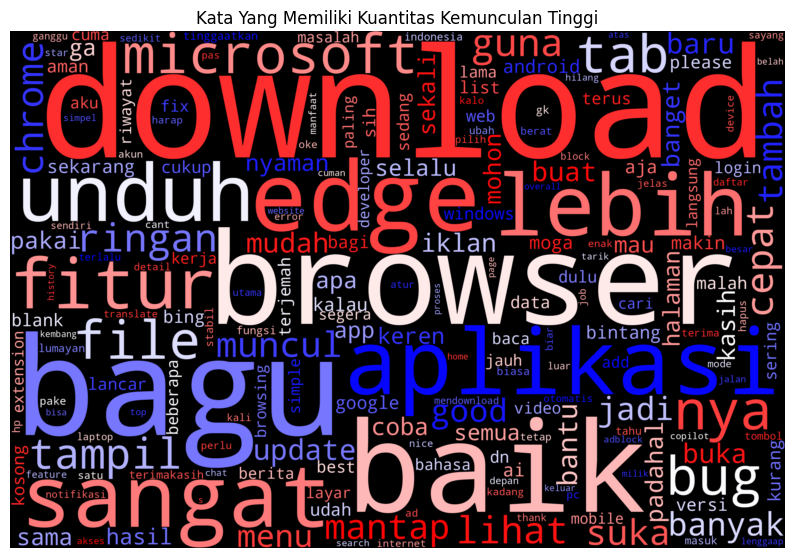

In [36]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


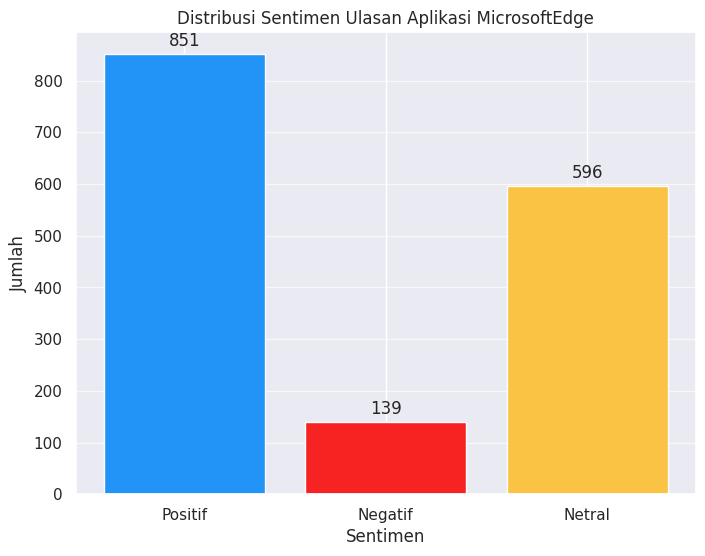

In [37]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MicrosoftEdge")


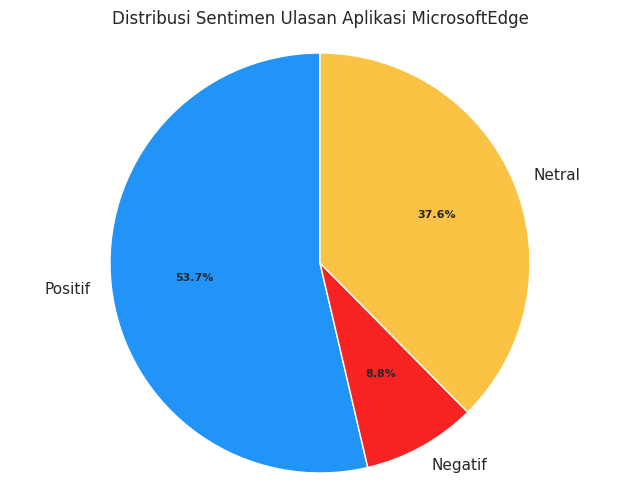

In [38]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MicrosoftEdge")

In [39]:
# Menghapus Sentimen Netral

data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,bug detail download muncul mohon baik,Bug detail download appears please good,Positif
1,sangat bagus,Very good.,Positif
2,ukur makin besar habis memori,larger and larger memory exhausted,Negatif
4,aku sangat suka web edge lebih mudah cepat,I really like the edge web faster.,Positif
6,good app,good app,Positif
...,...,...,...
1580,mantabbb,That's great.,Positif
1581,aplikasi smart,smart application,Positif
1582,kalau fitur ganti warna widget tampil cari kad...,if the color change feature widget appears sea...,Negatif
1583,easy to use,easy to use,Positif


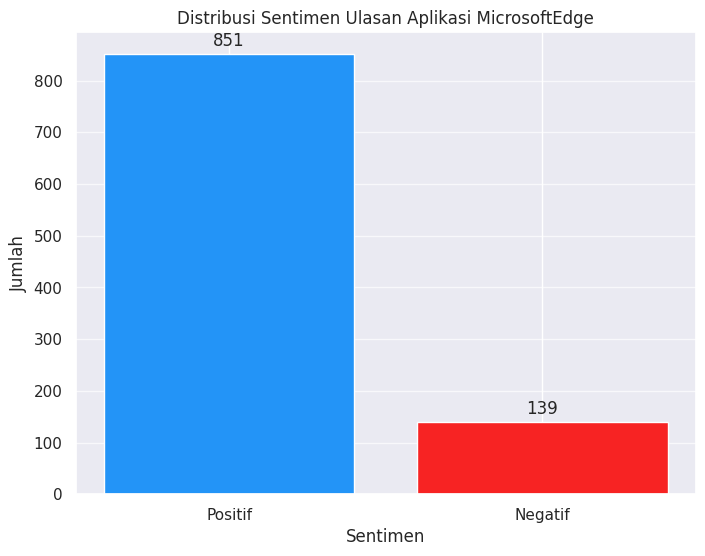

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MicrosoftEdge")


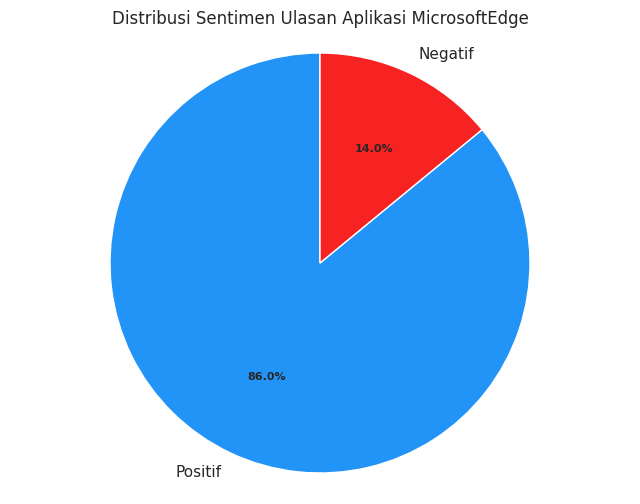

In [41]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MicrosoftEdge")

In [42]:
# Replace Data Sentimen

data = data.replace({'Positif':0, 'Negatif':1})
data

,content,content_en,sentimen
0,bug detail download muncul mohon baik,Bug detail download appears please good,0
1,sangat bagus,Very good.,0
2,ukur makin besar habis memori,larger and larger memory exhausted,1
4,aku sangat suka web edge lebih mudah cepat,I really like the edge web faster.,0
6,good app,good app,0
...,...,...,...
1580,mantabbb,That's great.,0
1581,aplikasi smart,smart application,0
1582,kalau fitur ganti warna widget tampil cari kad...,if the color change feature widget appears sea...,1
1583,easy to use,easy to use,0


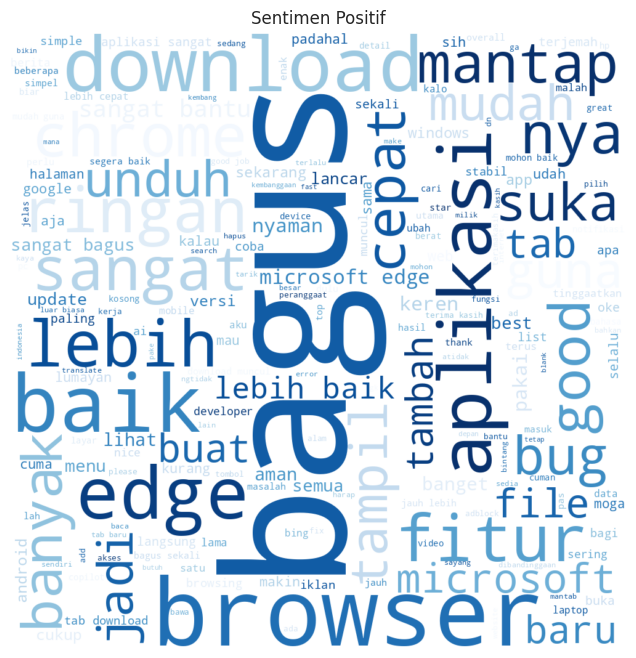

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data[data['sentimen'] == 0]
data_negatif = data[data['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

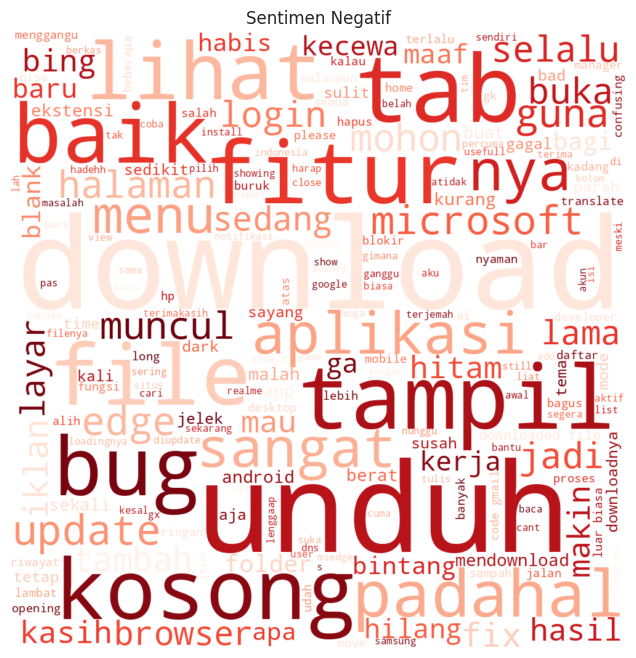

In [44]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

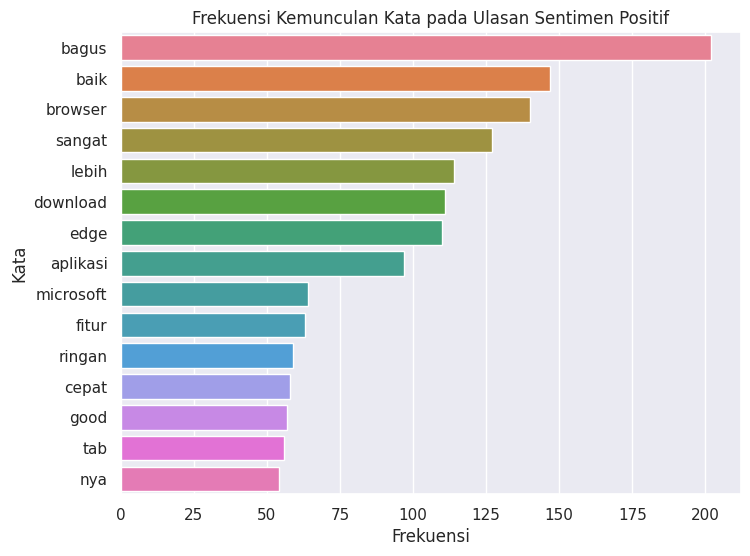

In [45]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data[data['sentimen'] == 0]['content'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 15
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [46]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

     kata  frekuensi
    bagus        202
     baik        147
  browser        140
   sangat        127
    lebih        114
 download        111
     edge        110
 aplikasi         97
microsoft         64
    fitur         63
   ringan         59
    cepat         58
     good         57
      tab         56
      nya         54


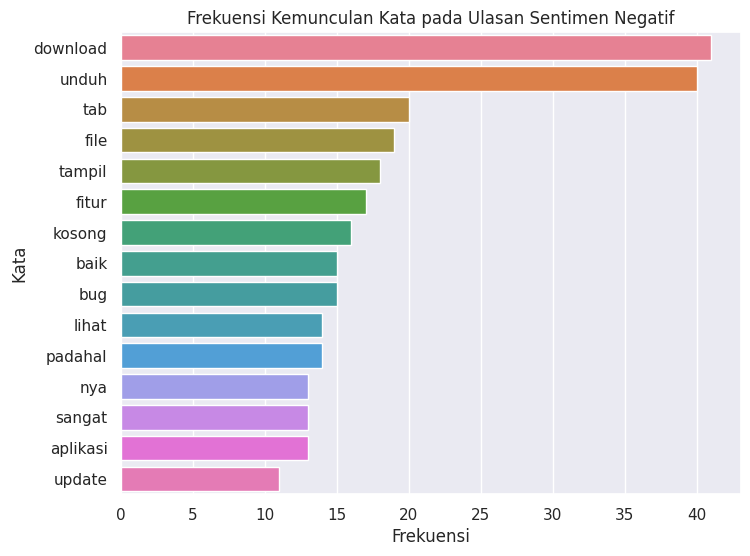

In [47]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data[data['sentimen'] == 1]['content'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 15
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [48]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
download         41
   unduh         40
     tab         20
    file         19
  tampil         18
   fitur         17
  kosong         16
    baik         15
     bug         15
   lihat         14
 padahal         14
     nya         13
  sangat         13
aplikasi         13
  update         11


In [49]:
# Menghitung Jumlah Sentimen Positif, Negatif

data['sentimen'].value_counts()

sentimen
0    851
1    139
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [50]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [51]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [52]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

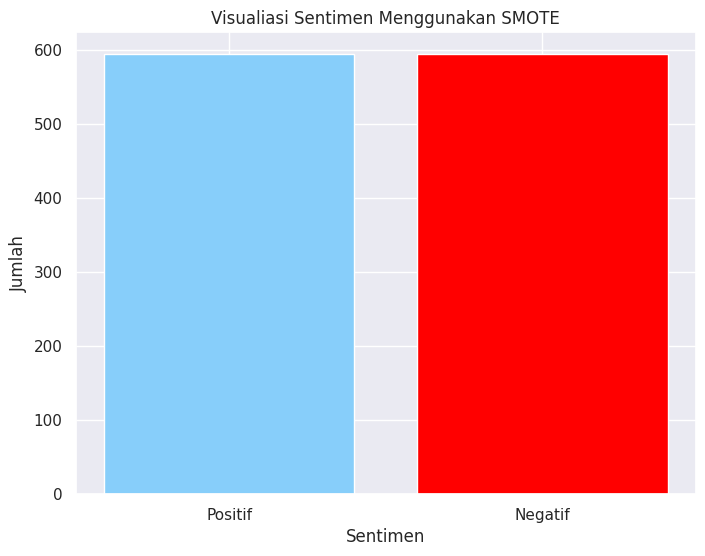

In [53]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [54]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [55]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [56]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [57]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8585858585858586

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.97      0.86      0.91       257
     Negatif       0.49      0.82      0.61        40

    accuracy                           0.86       297
   macro avg       0.73      0.84      0.76       297
weighted avg       0.90      0.86      0.87       297



In [58]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[222  35]
 [  7  33]]

True Positives (TP) =  222

True Negatives (TN) =  33

False Positives (FP) =  35

False Negatives (FN) =  7

Accuracy =  0.8585858585858586


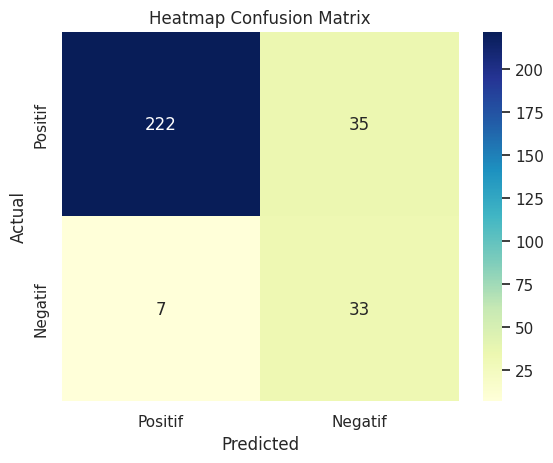

In [59]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif'],
                         index=['Positif','Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [60]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [61]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8586


In [62]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1414


# **Testing**

In [64]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : MASIH TIDAK ADA PERBAIKAN/PERUBAHAN! Halaman download tidak menampilkan berkas yang sedang/selesai di download.
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 77.67%
Probabilitas: 77.66603215496212 %


In [65]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : aplikasi ini memang sangat bagus bila di bandingkan dengan semua browser yang ada. nonton YouTube bisa bebas dari iklan. baca berita sangat nyaman. semoga ke depan bisa makin lebih baik lagi.
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 79.68%
Probabilitas: 79.67684730536924 %
